In [1]:
import os
import zipfile

local_zip = '/content/drive/MyDrive/kagglecatsanddogs_5340.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

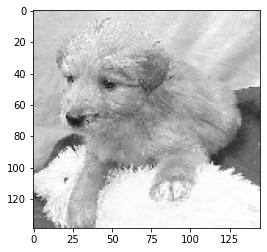

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

datadir = "/content/PetImages"
categories = ["Dog", "Cat"]

for category in categories:
    path = os.path.join(datadir, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap = "gray")
        plt.show
        break
    break

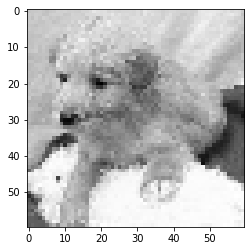

In [3]:
img_size = 60
new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(new_array, cmap = 'gray')
plt.show()

In [4]:
training_data = []

def createTrainingData():
    for category in categories:
        path = os.path.join(datadir, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

createTrainingData()

print(len(training_data))

24946


In [5]:
import random

random.shuffle(training_data)

In [6]:
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 1)
y = np.array(y)

In [7]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [14]:
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.python.keras.callbacks import TensorBoard
import time

name = "CatsvsDogs-cnn-64x3-drop-50bz-{}".format(int(time.time()))
tensorb = TensorBoard(log_dir = 'logs/{}'.format(name))

X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))

X = X/255.0

model = Sequential()

model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss = "binary_crossentropy",optimizer='adam', metrics = ['accuracy'])

model.fit(X, y, batch_size = 64, epochs = 20, validation_split = 0.2, callbacks = [tensorb])

model.save('64x3-CNN.model')

Epoch 1/10
624/624 [==============================] - 172s 275ms/step - loss: 0.6341 - accuracy: 0.6288 - val_loss: 0.5688 - val_accuracy: 0.7112
Epoch 2/10
624/624 [==============================] - 167s 268ms/step - loss: 0.5260 - accuracy: 0.7409 - val_loss: 0.4801 - val_accuracy: 0.7762
Epoch 3/10
624/624 [==============================] - 167s 268ms/step - loss: 0.4722 - accuracy: 0.7762 - val_loss: 0.4514 - val_accuracy: 0.7880
Epoch 4/10
624/624 [==============================] - 165s 265ms/step - loss: 0.4326 - accuracy: 0.7985 - val_loss: 0.4473 - val_accuracy: 0.7854
Epoch 5/10
624/624 [==============================] - 167s 268ms/step - loss: 0.4040 - accuracy: 0.8164 - val_loss: 0.4430 - val_accuracy: 0.7924
Epoch 6/10
624/624 [==============================] - 174s 279ms/step - loss: 0.3718 - accuracy: 0.8332 - val_loss: 0.4334 - val_accuracy: 0.7968
Epoch 7/10
624/624 [==============================] - 167s 268ms/step - loss: 0.3481 - accuracy: 0.8462 - val_loss: 0.4161 -

In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs

In [ ]:
import os
import zipfile

local_zip = '/content/drive/MyDrive/fotosprueba.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/test')
zip_ref.close()

In [ ]:
test_data = []

def createTestingData():

    path = os.path.join('/content/test')
    for img in os.listdir(path):
        test_data.append('/content/test/'+img)

createTestingData()

print(test_data[1])

/content/test/WhatsApp Image 2022-05-12 at 3.24.35 PM (6).jpeg


In [ ]:
import cv2
import tensorflow as tf

categories = ["Dog", "Cat"]

def prepare(filepath):
    img_size = 60
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (img_size, img_size))
    plt.imshow(img_array, cmap = "gray")
    plt.show

    return new_array.reshape(-1, img_size, img_size, 1)

model = tf.keras.models.load_model('64x3-CNN.model')

Cat


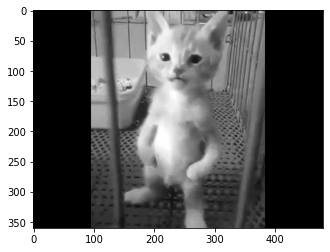

In [ ]:
prediction = model.predict([prepare('/content/gato5.jpg')])
print(categories[int(prediction[0][0])])